In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

import pickle

In [166]:
# import data from Fresno airport (closest to 00114 zip 93610)
dataset = '111452_36.77_-119.7_'

def get_header(year):
    return pd.read_csv('ca_energy_data/NREL_solar_data/cd103f7092a55f01908c95acdea7323a/'+dataset+year+'.csv',
                                     header=0, nrows=1)
def get_data(year):
    return pd.read_csv('ca_energy_data/NREL_solar_data/cd103f7092a55f01908c95acdea7323a/'+dataset+year+'.csv',
                             header=2)

In [167]:
solar_header_2011 = get_header('2011')
solar_header_2012 = get_header('2012')
solar_header_2013 = get_header('2013')
solar_header_2014 = get_header('2014')
solar_header_2015 = get_header('2015')
solar_header_2016 = get_header('2016')

In [168]:
solar_2011 = get_data('2011')
solar_2012 = get_data('2012')
solar_2013 = get_data('2013')
solar_2014 = get_data('2014')
solar_2015 = get_data('2015')
solar_2016 = get_data('2016')

In [169]:
solar_list = [solar_2011, solar_2012, solar_2013, solar_2014, solar_2015, solar_2016]

for data in solar_list:
    print(data.shape)

(8760, 22)
(8760, 22)
(8760, 22)
(8760, 22)
(8760, 22)
(8760, 22)


In [170]:
solar_header_2011.iloc[0]

Source                                         NSRDB
Location ID                                   111452
City                                               -
State                                              -
Country                                            -
Latitude                                       36.77
Longitude                                     -119.7
Time Zone                                         -8
Elevation                                        104
Local Time Zone                                   -8
Clearsky DHI Units                              w/m2
Clearsky DNI Units                              w/m2
Clearsky GHI Units                              w/m2
Dew Point Units                                    c
DHI Units                                       w/m2
DNI Units                                       w/m2
GHI Units                                       w/m2
Solar Zenith Angle Units                      Degree
Temperature Units                             

In [171]:
solar_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
Year                  8760 non-null int64
Month                 8760 non-null int64
Day                   8760 non-null int64
Hour                  8760 non-null int64
Minute                8760 non-null int64
DHI                   8760 non-null int64
DNI                   8760 non-null int64
GHI                   8760 non-null int64
Clearsky DHI          8760 non-null int64
Clearsky DNI          8760 non-null int64
Clearsky GHI          8760 non-null int64
Cloud Type            8760 non-null int64
Dew Point             8760 non-null int64
Solar Zenith Angle    8760 non-null float64
Fill Flag             8760 non-null int64
Surface Albedo        8760 non-null float64
Wind Speed            8760 non-null float64
Precipitable Water    8760 non-null float64
Wind Direction        8760 non-null float64
Relative Humidity     8760 non-null float64
Temperature           8760 non-null int64

In [172]:
solar_2011.head(5)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2011,1,1,0,30,0,0,0,0,0,...,-2,164.99,0,0.145,2.1,1.252,115.2,84.86,0,990.0
1,2011,1,1,1,30,0,0,0,0,0,...,-2,156.61,0,0.145,2.5,1.252,112.0,84.24,0,990.0
2,2011,1,1,2,30,0,0,0,0,0,...,-2,145.41,0,0.145,2.6,1.234,111.0,81.97,0,990.0
3,2011,1,1,3,30,0,0,0,0,0,...,-3,133.51,0,0.145,2.4,1.232,114.6,80.17,1,990.0
4,2011,1,1,4,30,0,0,0,0,0,...,-3,121.51,0,0.145,2.2,1.270,122.0,79.89,1,990.0


In [173]:
#GHI - Global Horizontal Irradiance
#DHI - Diffuse Horizontal Irradiance
#DNI - Direct Normal Irradiance

In [174]:
solar = pd.concat([solar_2011,solar_2012,solar_2013,solar_2014,solar_2015,solar_2016])

In [175]:
solar = solar[['Year','Month','Day','Hour','DHI','DNI','GHI']]

In [176]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52560 entries, 0 to 8759
Data columns (total 7 columns):
Year     52560 non-null int64
Month    52560 non-null int64
Day      52560 non-null int64
Hour     52560 non-null int64
DHI      52560 non-null int64
DNI      52560 non-null int64
GHI      52560 non-null int64
dtypes: int64(7)
memory usage: 3.2 MB


In [177]:
# Add missing dates
new_index = pd.date_range('2011-01-01 00:00:00', '2016-12-31 23:00:00',freq='H')
len(new_index)

52608

In [179]:
# Dates - missing leap days
solar.index = pd.to_datetime(solar[['Year','Month','Day','Hour']])
solar = solar.reindex(new_index,fill_value=0)
solar.drop(['Year','Month','Day','Hour'],axis=1,inplace=True)
solar

,DHI,DNI,GHI
2011-01-01 00:00:00,0,0,0
2011-01-01 01:00:00,0,0,0
2011-01-01 02:00:00,0,0,0
2011-01-01 03:00:00,0,0,0
2011-01-01 04:00:00,0,0,0
...,...,...,...
2016-12-31 19:00:00,0,0,0
2016-12-31 20:00:00,0,0,0
2016-12-31 21:00:00,0,0,0
2016-12-31 22:00:00,0,0,0


In [180]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52608 entries, 2011-01-01 00:00:00 to 2016-12-31 23:00:00
Freq: H
Data columns (total 3 columns):
DHI    52608 non-null int64
DNI    52608 non-null int64
GHI    52608 non-null int64
dtypes: int64(3)
memory usage: 1.6 MB


In [181]:
# # for leap years, take the average of the previous days in February
# # Impute NaNs
# cols = ['DHI','DNI','GHI']
# # test_array = np.array([0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])
# print(test_array.shape)
# for col in cols:
#     #fill in hours with daily avg
#     solar[col] = solar[[col]].fillna(solar[[col]][solar.index.date==dt.date(2012,2,28)])


In [183]:
# solar[solar.index.date==dt.date(2012,2,29)]

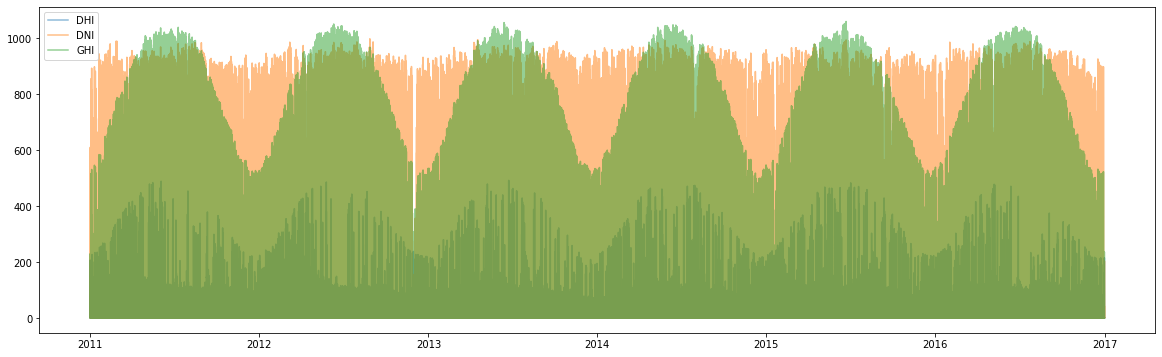

In [185]:
plt.figure(figsize=(20,6))
plt.plot(solar.index,solar['DHI'],label='DHI',alpha=0.5)
plt.plot(solar.index,solar['DNI'],label='DNI',alpha=0.5)
plt.plot(solar.index,solar['GHI'],label='GHI',alpha=0.5)
plt.legend();

In [186]:
with open('pickles/solar_fresno.pickle', 'wb') as to_write:
    pickle.dump(solar, to_write)